In [1]:
import os
import glob
import pandas as pd
os.environ['THEANO_FLAGS']='device=cpu'
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import time
from plotly.offline import init_notebook_mode, iplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.groupby(["hour","month","day"]).mean().groupby("timestamp").mean().reset_index()

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import decomposition

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
X = df.drop(['month','mode','sample','min','sec'], axis = 1)
Y = df['month']
X = pd.get_dummies(X, prefix_sep='_')

Y = LabelEncoder().fit_transform(Y)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


x_new_df=pd.DataFrame(X_pca,columns=['V1','V2'])
y_new_df=pd.DataFrame(Y,columns=['month'])
x_new_df

,V1,V2
0,-6.120821e+08,2.370803e+08
1,-6.120820e+08,2.370803e+08
2,-6.120820e+08,2.370804e+08
3,-6.120820e+08,2.370804e+08
4,-6.120820e+08,2.370805e+08
...,...,...
1062907,3.365065e+08,-1.166779e+08
1062908,3.365065e+08,-1.166778e+08
1062909,3.365064e+08,-1.166778e+08
1062910,3.365064e+08,-1.166778e+08


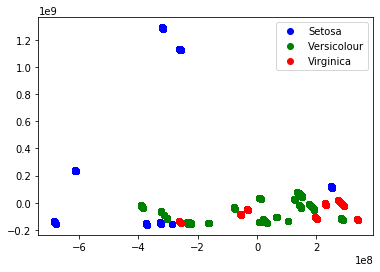

In [6]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[Y == 0, 0], X_pca[Y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[Y == 1, 0], X_pca[Y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[Y == 2, 0], X_pca[Y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

Projecting 11-dimensional data to 2D


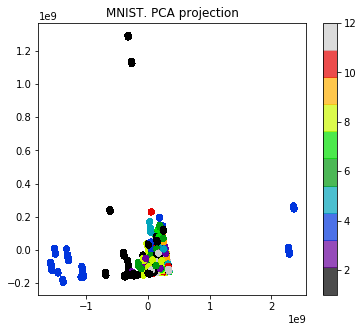

In [23]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(6,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

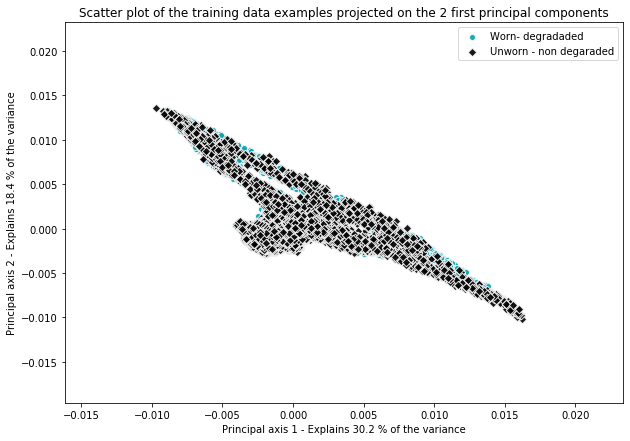

In [21]:
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
            classes = np.sort(np.unique(y_train))
            labels = ["Worn- degradaded ", "Unworn - non degaraded"]
            x_train_normalized = normalize(x_train, axis=0)

            pca = PCA(n_components=2)
            x_train_projected = pca.fit_transform(x_train_normalized)
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(1, 1, 1)
            colors = [(0.0, 0.63, 0.69), 'black']
            markers = ["o", "D"]
            for class_ix, marker, color, label in zip(
                    classes, markers, colors, labels):
                ax.scatter(x_train_projected[np.where(y_train == class_ix), 0],
                           x_train_projected[np.where(y_train == class_ix), 1],
                           marker=marker, color=color, edgecolor='whitesmoke',
                           linewidth='1', alpha=0.9, label=label)
                ax.legend(loc='best')
            plt.title(
                "Scatter plot of the training data examples projected on the "
                "2 first principal components")
            plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
                pca.explained_variance_ratio_[0] * 100.0))
            plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
                pca.explained_variance_ratio_[1] * 100.0))
            plt.show()

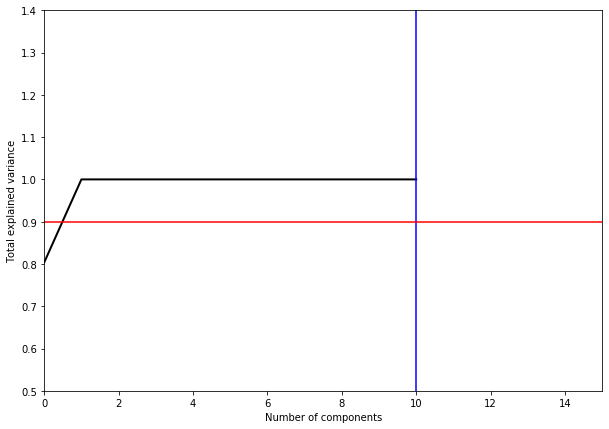

In [9]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 15)
plt.yticks(np.arange(0.5, 1.5, 0.1))
plt.axvline(10, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [10]:
#df = df.groupby(["hour","month","day"]).mean().groupby("month").mean().reset_index()
#df

In [15]:
X = df.drop(['month','mode','sample','min','sec'], axis = 1)
Y = df['month']
X = pd.get_dummies(X, prefix_sep='_')
pca_new=PCA(n_components=2)
pca_new.fit(X)
x_new=pca_new.transform(X)
x_new_df=pd.DataFrame(x_new,columns=['V1','V2'])
y_new_df=pd.DataFrame(Y,columns=['month'])
x_new_df

,V1,V2
0,-6.120821e+08,2.370803e+08
1,-6.120820e+08,2.370803e+08
2,-6.120820e+08,2.370804e+08
3,-6.120820e+08,2.370804e+08
4,-6.120820e+08,2.370805e+08
...,...,...
1062907,3.365065e+08,-1.166779e+08
1062908,3.365065e+08,-1.166778e+08
1062909,3.365064e+08,-1.166778e+08
1062910,3.365064e+08,-1.166778e+08


In [16]:
final_data=pd.concat([x_new_df,y_new_df],axis=1)
final_data.head()

,V1,V2,month
0,-6.120821e+08,2.370803e+08,1
1,-6.120820e+08,2.370803e+08,1
2,-6.120820e+08,2.370804e+08,1
3,-6.120820e+08,2.370804e+08,1
4,-6.120820e+08,2.370805e+08,1


In [17]:
ind=final_data.iloc[:,:-1].values
dep=final_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(850329, 2)
(212583, 2)
(850329,)
(212583,)


In [18]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='lbfgs', multi_class='auto')
log_model.fit(x_train,y_train)
log_pred=log_model.predict(x_test)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test,log_pred)

0.2272194860360424

In [20]:
log_model.score(x_test,y_test)

0.2272194860360424